# The Visible human dataset in napari

In [1]:
# Download and unzip data from https://mri.radiology.uiowa.edu/visible_human_datasets.html
import tarfile
import urllib.request
from pathlib import Path

url = "https://mri.radiology.uiowa.edu/VHDicom/VHFCT1mm/VHF-Knee.tar.gz"
path_zip = Path.cwd() / "VHF-Knee.tar.gz"
urllib.request.urlretrieve(url, path_zip)
tar = tarfile.open(path_zip, "r:gz")
tar.extractall()
tar.close()
path_zip.unlink()


In [2]:
# remove the one image that is broken
bad_image = Path.cwd() / "Knee" / "vhf.316.dcm"
bad_image.unlink()

(-0.5, 1599.5, 1199.5, -0.5)

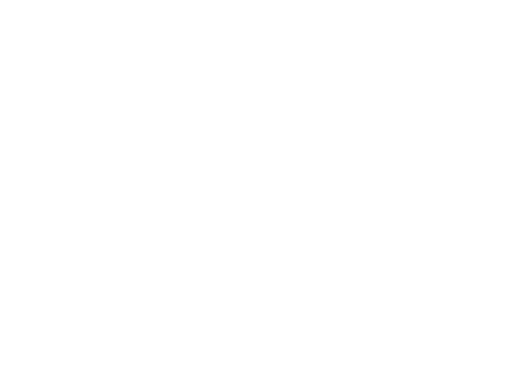

In [1]:
# Load data to napari
import napari
import matplotlib.pyplot as plt
import numpy as np
viewer = napari.Viewer()
path = "Knee"
# viewer.open(path)
viewer.dims.ndisplay = 3
viewer.camera.angles = (0, 20, 50)
img = viewer.screenshot(canvas_only=True, flash=False)

plt.imshow(img)
plt.axis("off")

In [2]:
from manim import *
config.media_embed = True

Manim Community v0.17.2

In [5]:
def make_plot(zoom, angle1, angle2, angle3, parameter):
    viewer.camera.zoom = zoom
    viewer.camera.angles = (angle1, angle2, angle3)
    viewer.layers[0].gamma = parameter
    img = viewer.screenshot(canvas_only=True, flash=False)
    return img

class Example(Scene):
    def construct(self):
        self.camera.background_color = BLUE_A

        tr_zoom = ValueTracker(1)
        tr_angle1 = ValueTracker(0)
        tr_angle2 = ValueTracker(0)
        tr_angle3 = ValueTracker(90)
        tr_para = ValueTracker(1)

        image = ImageMobject(
            make_plot(
                tr_zoom.get_value(),
                tr_angle1.get_value(),
                tr_angle2.get_value(),
                tr_angle3.get_value(),
                tr_para.get_value(),
            )
        )
        self.add(image)

        def update_image(mob):
            new_mob = ImageMobject(
                make_plot(
                    tr_zoom.get_value(),
                    tr_angle1.get_value(),
                    tr_angle2.get_value(),
                    tr_angle3.get_value(),
                    tr_para.get_value(),
                )
            )
            mob.become(new_mob)

        image.add_updater(update_image)
        self.play(tr_zoom.animate.set_value(2), rate_func=smooth, run_time=1.0)
        self.play(
            tr_angle1.animate.set_value(20),
            tr_angle2.animate.set_value(-25),
            tr_angle3.animate.set_value(20),
            rate_func=smooth,
            run_time=1.0,
        )

        # self.play(tr_para.animate.set_value(0.6), rate_func=smooth, run_time=0.5)
        self.wait(0.2)
        # self.play(tr_para.animate.set_value(1), rate_func=smooth, run_time=0.5)
        self.play(tr_zoom.animate.set_value(1), rate_func=smooth, run_time=1.0)
        self.play(
                    tr_angle1.animate.set_value(0),
                    tr_angle2.animate.set_value(0),
                    tr_angle3.animate.set_value(90),
                    rate_func=smooth,
                    run_time=1.0,
                )
        self.wait(0.2)

%manim -v WARNING -qh --disable_caching --progress_bar None Example